In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [3]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks")

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/content/drive/My Drive/Colab Notebooks'

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [1]:
data=pd.read_csv('AirTemp.csv')

NameError: name 'pd' is not defined

In [5]:
date_rng=pd.date_range(start='1/1/1920',end='31/12/1939',freq='M')

In [6]:
data['Timeindex']=pd.DataFrame(date_rng,columns=['Month'])

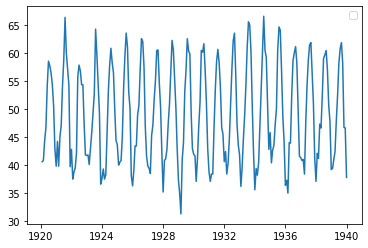

In [7]:
#plot the avg temp
plt.plot(data.Timeindex,data.AvgTemp)
plt.legend(loc='best')
plt.show()

In [8]:
#plot the avg forecast

In [9]:
temp_avg=data.copy()

In [10]:
temp_avg['avg_forecast']=data['AvgTemp'].mean()

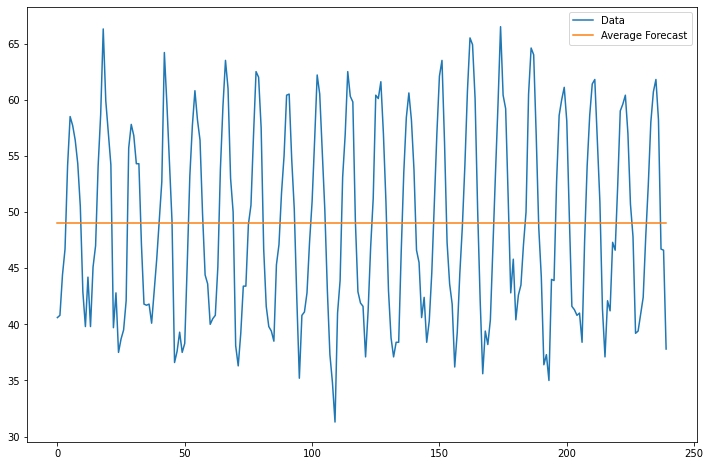

In [11]:
plt.figure(figsize=(12,8))
plt.plot(data['AvgTemp'],label='Data')
plt.plot(temp_avg['avg_forecast'],label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [12]:
#plot the moving average forecast and average temperature
mvg_avg=data.copy()

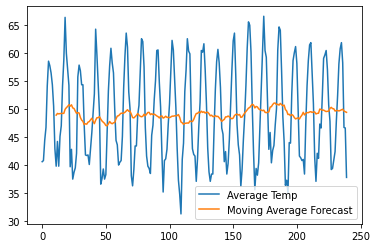

In [13]:
mvg_avg['moving_average_forecast']=data['AvgTemp'].rolling(12).mean()
plt.plot(data['AvgTemp'],label='Average Temp')
plt.plot(mvg_avg['moving_average_forecast'],label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [14]:
#ARIMA Models
#random walk

In [15]:
import pandas as pd 
import numpy as np
from random import seed,random
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error 
from statsmodels.tsa.stattools import adfuller

In [16]:
seed(1)
random_walk=list()
random_walk.append(-1 if random()<0.5 else 1)

In [17]:
for i in range(1,1000):
  movement=-1 if random() <0.5 else 1
  value=random_walk[i-1]+movement
  random_walk.append(value)

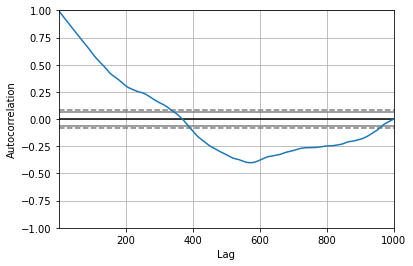

In [18]:
pd.plotting.autocorrelation_plot(random_walk)

In [19]:
#check for stationarity

In [20]:
result=adfuller(random_walk)

In [23]:
print("ADF Statistic:",result[0])
print("p-value:",result[1])
print("critical value:")
for key,value in result[4].items():
  print(key,value)

ADF Statistic: 0.34160454935399814
p-value: 0.9791747967918744
critical value:
1% -3.4369127451400474
5% -2.864437475834273
10% -2.568312754566378


In [27]:
training_size=int(len(random_walk)*.70)
training,test=random_walk[0:training_size],random_walk[training_size:]
predictions=list()
hist=training[-1]
for i in range(len(test)):
  yhat=hist
  predictions.append(yhat)
  hist=test[i]

In [28]:
rmse=np.sqrt(mean_squared_error(test,predictions))
print("rmse:",rmse)

rmse: 1.0


In [29]:
#Auto ARIMA
#seasonal arima----P,Q,D
#auto.arima----module----it fits the best ARIMA model to univariate series
#AIC---Akaike information criterion----means for model collection
#AICc---AIC with a correlation for small sample sizes
#BIC----BAyesian information criterion(SIC----schwarz information
#criterion).models with lowest BIC preferred

In [32]:
import sys 
import pandas as pd
import warnings
import itertools
warnings.filterwarnings("ignore")
import numpy as np
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [33]:
data=pd.read_csv('TractorSales.csv')

In [34]:
data.head()

,Month-Year,Number of Tractor Sold
0,3-Jan,141
1,3-Feb,157
2,3-Mar,185
3,3-Apr,199
4,3-May,203


In [36]:
dates=pd.date_range(start='2003-01-01',freq='MS',periods=len(data))

In [37]:
import calendar

In [38]:
data['Month']=dates.month

In [40]:
data['Month']=data['Month'].apply(lambda x:calendar.month_abbr[x])

In [41]:
data['Year']=dates.year

In [42]:
data.drop(['Month-Year'],axis=1,inplace=True)

In [43]:
data.rename(columns={"Number of Tractor Sold":"Tractor-Sales"},inplace=True)

In [44]:
data=data[['Month','Year','Tractor-Sales']]

In [46]:
data.set_index(dates,inplace=True)

In [47]:
data.head()

,Month,Year,Tractor-Sales
2003-01-01,Jan,2003,141
2003-02-01,Feb,2003,157
2003-03-01,Mar,2003,185
2003-04-01,Apr,2003,199
2003-05-01,May,2003,203


In [49]:
sales_ts=data['Tractor-Sales']


Text(0, 0.5, 'Tractor Sales')

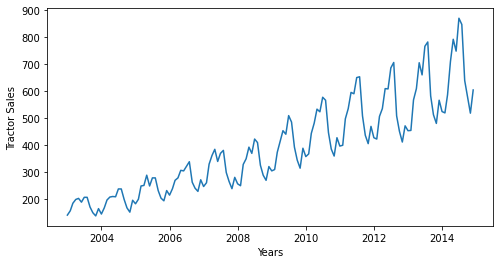

In [50]:
plt.figure(figsize=(8,4))
plt.plot(sales_ts)
plt.xlabel('Years')
plt.ylabel('Tractor Sales')

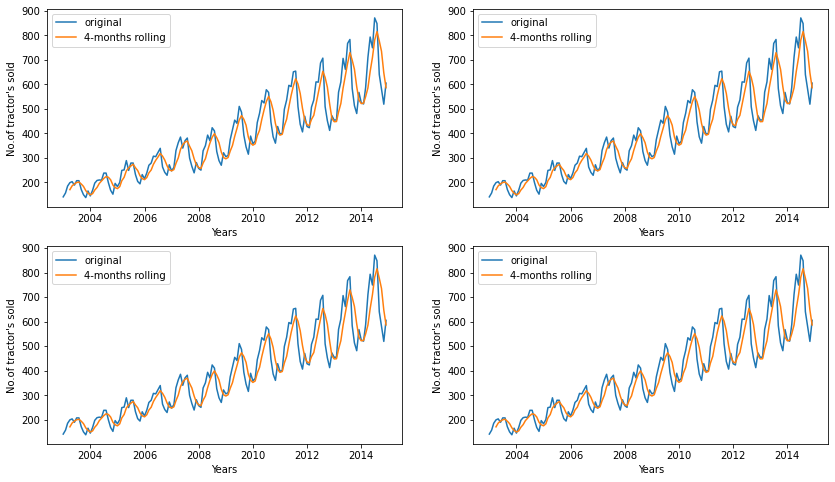

In [51]:
#Moving averages
fig,axes=plt.subplots(2,2)
fig.set_figwidth(14)
fig.set_figheight(8)
axes[0][0].plot(sales_ts.index,sales_ts,label='original')
axes[0][0].plot(sales_ts.index,sales_ts.rolling(window=4).mean(),label='4-months rolling')
axes[0][0].set_xlabel('Years')
axes[0][0].set_ylabel("No.of tractor's sold")
axes[0][0].legend(loc='best')
axes[0][1].plot(sales_ts.index,sales_ts,label='original')
axes[0][1].plot(sales_ts.index,sales_ts.rolling(window=4).mean(),label='4-months rolling')
axes[0][1].set_xlabel('Years')
axes[0][1].set_ylabel("No.of tractor's sold")
axes[0][1].legend(loc='best')
axes[1][0].plot(sales_ts.index,sales_ts,label='original')
axes[1][0].plot(sales_ts.index,sales_ts.rolling(window=4).mean(),label='4-months rolling')
axes[1][0].set_xlabel('Years')
axes[1][0].set_ylabel("No.of tractor's sold")
axes[1][0].legend(loc='best')
axes[1][1].plot(sales_ts.index,sales_ts,label='original')
axes[1][1].plot(sales_ts.index,sales_ts.rolling(window=4).mean(),label='4-months rolling')
axes[1][1].set_xlabel('Years')
axes[1][1].set_ylabel("No.of tractor's sold")
axes[1][1].legend(loc='best')
plt.show()

In [52]:
#determine rolling statistics
rolmean=sales_ts.rolling(window=4).mean()
rolstd=sales_ts.rolling(window=4).std()

Text(0.5, 1.0, 'Rolling Mean & std deviation statistics')

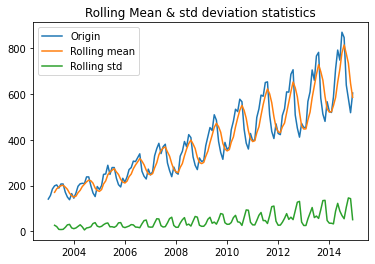

In [54]:
#plot rolling statistics
orig=plt.plot(sales_ts,label='Origin')
mean=plt.plot(rolmean,label='Rolling mean')
std=plt.plot(rolstd,label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & std deviation statistics')

In [55]:
from statsmodels.tsa.stattools import adfuller

In [57]:

dftest=adfuller(sales_ts)
dftest
print("DF test statics:",dftest[0])
print("DF test p-vale:",dftest[1])

DF test statics: 1.1088250591467341
DF test p-vale: 0.9952912415248419


In [62]:
monthly_sales_data=pd.pivot_table(data,values="Tractor-Sales",columns="Year",index="Month")

In [64]:
monthly_sales_data

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Apr,199,208,251,279,362,350,414,482,536,536,610,710
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Dec,165,196,232,272,281,321,389,428,470,472,567,605
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Mar,185,197,249,270,330,329,374,444,498,507,568,587
May,203,210,289,307,385,393,454,534,596,610,706,793


In [67]:
monthly_sales_data=monthly_sales_data.reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

In [68]:
monthly_sales_data

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Mar,185,197,249,270,330,329,374,444,498,507,568,587
Apr,199,208,251,279,362,350,414,482,536,536,610,710
May,203,210,289,307,385,393,454,534,596,610,706,793
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Sep,171,199,232,263,299,326,393,447,509,509,583,640


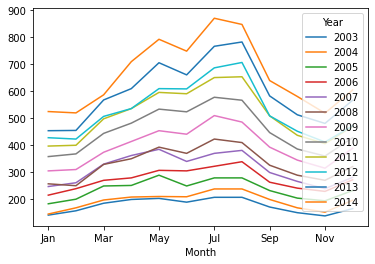

In [77]:
monthly_sales_data.plot()

In [75]:
yearly_sales_data=pd.pivot_table(data,values="Tractor-Sales",columns='Month',index="Year")

In [80]:
yearly_sales_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2003,141,157,185,199,203,189,207,207,171,150,138,165
2004,145,168,197,208,210,209,238,238,199,168,152,196
2005,183,200,249,251,289,249,279,279,232,204,194,232
2006,215,239,270,279,307,305,322,339,263,241,229,272
2007,247,261,330,362,385,340,370,381,299,266,239,281
2008,257,250,329,350,393,370,423,410,326,289,270,321
2009,305,310,374,414,454,441,510,486,393,345,315,389
2010,358,368,444,482,534,524,578,567,447,386,360,428
2011,397,400,498,536,596,591,651,654,509,437,406,470


In [79]:
yearly_sales_data

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
2003,199,207,165,157,141,207,189,185,203,138,150,171
2004,208,238,196,168,145,238,209,197,210,152,168,199
2005,251,279,232,200,183,279,249,249,289,194,204,232
2006,279,339,272,239,215,322,305,270,307,229,241,263
2007,362,381,281,261,247,370,340,330,385,239,266,299
2008,350,410,321,250,257,423,370,329,393,270,289,326
2009,414,486,389,310,305,510,441,374,454,315,345,393
2010,482,567,428,368,358,578,524,444,534,360,386,447
2011,536,654,470,400,397,651,591,498,596,406,437,509


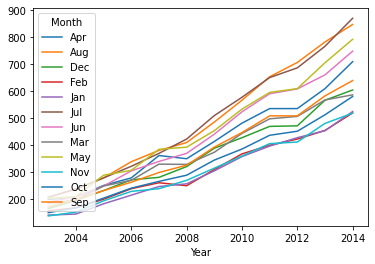

In [81]:
yearly_sales_data.plot()

In [82]:
#time series decomposition

In [84]:
decomposition=(sm.tsa.seasonal_decompose)sales_ts,model='multiplicative'

SyntaxError: ignored